<a href="https://colab.research.google.com/github/javiervasquezufm/ELEMENTS-OF-MACHINE-LEARNING/blob/master/RegresionPolinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 8

En este laboratorio aplicaremos regresión polinomial de grado n para estudiar el sobreajuste a datos generados con ruido aleatorio

In [0]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels
import statsmodels.formula.api as smf

from sklearn.datasets import load_boston

print("Todos los paquetes han sido importados:")

Todos los paquetes han sido importados:


Generemos datos a partir de una función senoidal

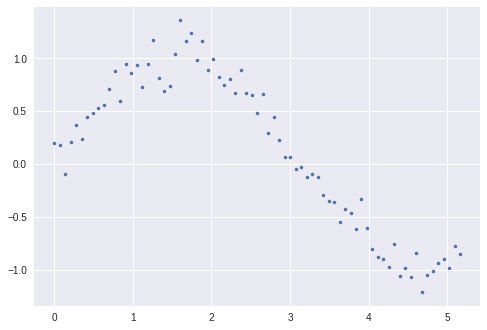

In [0]:
import random
from matplotlib.pylab import rcParams

#Tomemos ángulos de 0 a 300
x = np.array([i*np.pi/180 for i in range(0,300,4)])
np.random.seed(10) 
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

## Ejercicios

1.   Sobre los datos generados, realiza regresiones polinomiales de grado 1 a 16. Guarda los coeficientes, RMS de entrenamiento y R^2 para cada regresión
2.   Genera un nuevo set de datos usando a partir de la misma función seno y utiliza este conjunto como el set de prueba. Guarda el RMS de prueba para cada uno.
3.   Compara los RMS de prueba de todas las regresiones. ¿Hay algún grado polinomial que minimiza el RMS de prueba para este modelo? ¿Notas sobreajuste para polinomios de alto grado?
4.   Repite este procedimiento aumentando la magnitud de los errores aleatorios.




In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
newX = pd.DataFrame(scaler.fit_transform(x),columns=list(x))

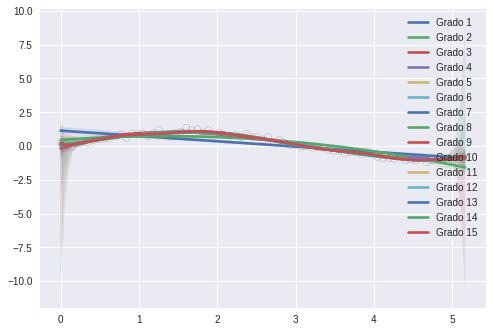

In [0]:
plt.scatter(x, y, facecolor="None", edgecolor="k", alpha=0.4)
for i in range(1, 16):
    sns.regplot(x, y, order=i, scatter=False, truncate=True, label="Grado {}".format(i))
plt.legend()
plt.show()

In [0]:
z = np.polyfit(x, y, deg=4, cov=True)
betas = z[0]

betas

array([ 0.01810198, -0.09109074, -0.28266211,  1.24789976, -0.02031733])

In [0]:
C = z[1]

C

array([[ 1.99595625e-05, -2.06229169e-04,  6.81894522e-04,
        -7.70723895e-04,  1.87045747e-04],
       [-2.06229169e-04,  2.16547599e-03, -7.31403933e-03,
         8.51445267e-03, -2.16186692e-03],
       [ 6.81894522e-04, -7.31403933e-03,  2.54374903e-02,
        -3.09161306e-02,  8.43417356e-03],
       [-7.70723895e-04,  8.51445267e-03, -3.09161306e-02,
         4.02647114e-02, -1.25386458e-02],
       [ 1.87045747e-04, -2.16186692e-03,  8.43417356e-03,
        -1.25386458e-02,  5.44082273e-03]])

In [0]:
pows = np.arange(5)

def se(C, ed):
    l0 = np.power(ed, pows)
    l0 = l0[::-1]
    return np.sqrt(np.dot(l0.T, np.dot(C, l0)))

In [0]:
d1 = np.arange(x.min(), x.max() + 1, 1)
SE = np.array([se(C, e) for e in d1])

In [0]:
p = np.poly1d(z[0])

print(np.poly1d(p))

        4           3          2
0.0181 x - 0.09109 x - 0.2827 x + 1.248 x - 0.02032


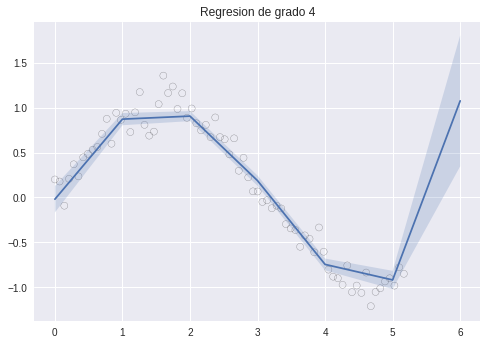

In [0]:
sup = p(d1) + 2*SE
inf = p(d1) - 2*SE
plt.scatter(x, y, facecolor="None", edgecolor="k", alpha=0.5)
plt.plot(d1, p(d1))
plt.plot(d1, sup, alpha=0)
plt.plot(d1, inf, alpha=0)
plt.fill_between(d1, inf, sup, alpha=0.2)
plt.title("Regresion de grado 4")
plt.show()